## Step 0. configurations

In [15]:
import warnings
warnings.filterwarnings("ignore")

## Step 1. reading data and importing libraries

In [16]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [17]:
df = pd.read_csv("./titanic-publicleaderboard-2024-04-17T17_58_43.csv")
df.head()

,Rank,TeamId,TeamName,LastSubmissionDate,Score,SubmissionCount,TeamMemberUserNames
0,1,11652059,YinanJuliaZhu,2024-02-18 00:22:36,1.0,3,yinanjuliazhu
1,2,11652100,CrhnbP,2024-02-18 00:58:18,1.0,3,crhnbp
2,3,11652664,Sakib Hasan #2,2024-02-18 07:19:27,1.0,1,sakibhrana
3,4,11652819,Jiao Huang,2024-02-18 08:36:18,1.0,3,jiaohuang
4,5,11654369,Jaspreet Kaur Patpatia,2024-02-18 17:49:02,1.0,3,jaspreetkaurpatpatia


## Step 2. understanding the data

In [18]:
df.shape

(15611, 7)

In [19]:
df.columns

Index(['Rank', 'TeamId', 'TeamName', 'LastSubmissionDate', 'Score',
       'SubmissionCount', 'TeamMemberUserNames'],
      dtype='object')

In [20]:
df.index

RangeIndex(start=0, stop=15611, step=1)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15611 entries, 0 to 15610
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rank                 15611 non-null  int64  
 1   TeamId               15611 non-null  int64  
 2   TeamName             15611 non-null  object 
 3   LastSubmissionDate   15611 non-null  object 
 4   Score                15611 non-null  float64
 5   SubmissionCount      15611 non-null  int64  
 6   TeamMemberUserNames  15611 non-null  object 
dtypes: float64(1), int64(3), object(3)
memory usage: 853.9+ KB


In [22]:
df.describe()

,Rank,TeamId,Score,SubmissionCount
count,15611.000000,1.561100e+04,15611.000000,15611.000000
mean,7805.000000,1.135415e+07,0.760524,3.775287
std,4506.651861,1.682878e+06,0.084458,6.784916
min,0.000000,2.489700e+04,0.000000,1.000000
25%,3902.500000,1.167940e+07,0.765550,1.000000
50%,7805.000000,1.177279e+07,0.775110,1.000000
75%,11707.500000,1.185418e+07,0.777510,4.000000
max,15610.000000,1.196613e+07,1.000000,218.000000


## Step 3. Visualizing

In [23]:
mean_score = round(df["Score"].mean(), 2)
mean_score

0.76

### Distibution of `Score`

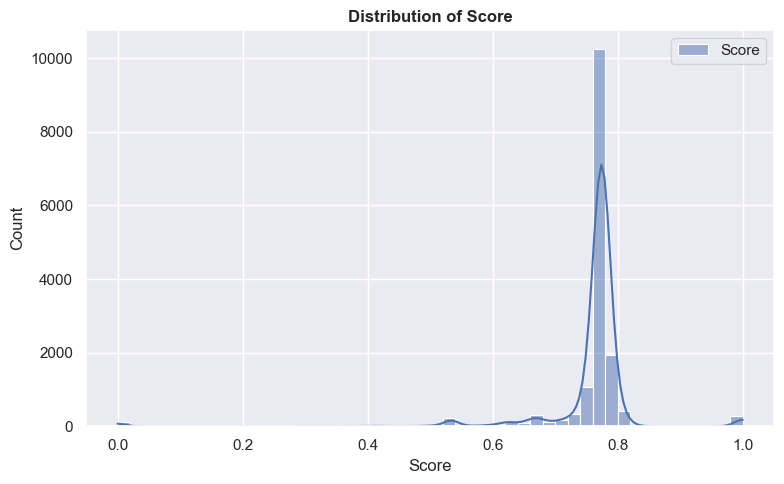

In [45]:
column = "Score"

plt.figure(figsize=(8, 5))
sns.histplot(df[column], kde=True, bins=50, label=column)
plt.title(f"Distribution of {column}", fontweight="bold")
plt.legend()

plt.tight_layout()
plt.show()

### Distibution of `Score` without outliers

- Scores of 0 are mistakes
- Scores of 1 are cheating :) 

In [67]:
def rem_outliers(data):
    data = data[data["Score"] < 1]
    data = data[data["Score"] > 0]

    # data = data[data["SubmissionCount"] >= 3]

    return data



df_no_outliers = rem_outliers(df)

In [68]:
df_no_outliers.shape

(15247, 7)

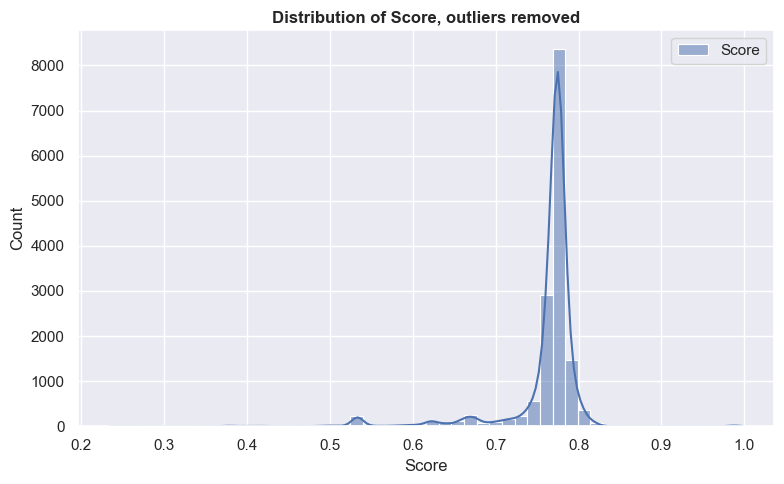

In [69]:
column = "Score"

plt.figure(figsize=(8, 5))
sns.histplot(df_no_outliers[column], kde=True, bins=50, label=column)
plt.title(f"Distribution of {column}, outliers removed", fontweight="bold")
plt.legend()

plt.tight_layout()
plt.show()